<a href="https://colab.research.google.com/github/kkrusere/youTube-comments-Analyzer/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb

wget -N https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/118.0.5993.70/linux64/chromedriver-linux64.zip -P /tmp/
unzip -o /tmp/chromedriver-linux64.zip -d /tmp/
chmod +x /tmp/chromedriver-linux64/chromedriver
mv /tmp/chromedriver-linux64/chromedriver /usr/local/bin/chromedriver
pip install selenium chromedriver_autoinstaller

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 229 kB in 3s (86.7 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
46 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependen

In [2]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')


from selenium import webdriver
import chromedriver_autoinstaller
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
import time


chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chromedriver_autoinstaller.install()
driver = webdriver.Chrome(options=chrome_options)


from bs4 import BeautifulSoup

In [3]:
# YouTube video URL
video_url = "https://www.youtube.com/watch?v=cZlsZwcIgpc"

In [4]:
try:
    wait = WebDriverWait(driver, 5)

    # Open the YouTube video
    driver.get(video_url)

    wait.until(EC.visibility_of_element_located((By.TAG_NAME, 'body')))

    # Scroll down to load comments
    last_height = 0
    while True:
        # Scroll to the end of the page
        #driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
        # Scroll using page-manager element's scroll height
        driver.execute_script("window.scrollTo(0, document.getElementById('page-manager').scrollHeight);")
        time.sleep(10)  # Adjust sleep time as needed

        # Get the current page height
        new_height = driver.execute_script("return document.getElementById('page-manager').scrollHeight")

        # Break the loop if no more content is loaded
        if new_height == last_height:
            break

        last_height = new_height

    # Wait for the comments section to be visible
    comments_section = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "ytd-comments#comments.style-scope.ytd-watch-flexy")))

    # Get the HTML content of the comments section
    comments_html = comments_section.get_attribute('outerHTML')

finally:
    # Close the WebDriver session
    driver.quit()



In [5]:
soup = BeautifulSoup(comments_html, 'html.parser')

# Find the span element with the specified class
comment_count_span = soup.find('span', class_='style-scope yt-formatted-string')

# Extract the text content of the span element
comment_count = comment_count_span.text.strip()

# Print or use the comment count
print("Comment Count:", comment_count)

Comment Count: 23,211


In [6]:
# Find all occurrences of the ytd-comment-thread-renderer element
comment_thread_renderers = soup.find_all('ytd-comment-thread-renderer', class_='style-scope ytd-item-section-renderer')

# Count the number of occurrences
comment_thread_count = len(comment_thread_renderers)

# Print or use the comment thread count
print("Number of ytd-comment-thread-renderer elements:", comment_thread_count)

Number of ytd-comment-thread-renderer elements: 80


In [7]:
comments = []
# Iterate through each comment thread renderer
for comment_thread_renderer in comment_thread_renderers:

    # Extracting the comment text
    comment_text_element = comment_thread_renderer.find('yt-attributed-string', id='content-text')
    comment_text = comment_text_element.get_text(strip=True) if comment_text_element else None

    # Extracting the number of likes
    like_count_element = comment_thread_renderer.find('span', class_='style-scope ytd-comment-engagement-bar')
    like_count = like_count_element.get_text(strip=True) if like_count_element else None

    # Extracting the number of replies
    reply_count_element = comment_thread_renderer.find('ytd-button-renderer', id='more-replies')
    reply_count = reply_count_element.get_text(strip=True) if reply_count_element else None

    comments.append(comment_text)

    print("Comment Text:", comment_text)
    print("Like Count:", like_count)
    print("Reply Count:", reply_count)

    print("\n\n\n")


Comment Text: Prices are too high, and dealerships keep adding more dealership fees. It's ridiculous. On top of that, interest rates don't help.
Like Count: 3.9K
Reply Count: 216 replies




Comment Text: A major obstacle to EV adoption that is always overlooked is the inability of apartment dwellers to charge at home.
Like Count: 6K
Reply Count: 507 replies




Comment Text: The government isn’t fast enough to patch potholes on the roads. How could you expect to have enough charging stations.
Like Count: 87
Reply Count: 6 replies




Comment Text: We have the coldest winters in many years here in Scandinavia,  some places they never have seen lower tempraturs in recorded history,  and the EV's and yeah electric buses that we have struggles big time , the buses often take no charge at all.  many EVs is also crazy expensive to repair.
Like Count: 32
Reply Count: 1 reply




Comment Text: Im not fond of Tesla, but I do like the fact that they've been steadily slashing the prices of their

In [8]:
from google.colab import userdata
api_key = userdata.get('YouTubeAPI_key')

In [9]:
import googleapiclient.discovery
import datetime

import matplotlib.pyplot as plt
import matplotlib.image as mpimg



# Extract video ID from URL
video_id = video_url.split('=')[1]


print("Video ID:", video_id)

# Create YouTube API client
youtube = googleapiclient.discovery.build("youtube", "v3", developerKey=api_key)

# Request video details
response = youtube.videos().list(
    part="snippet,statistics",
    id=video_id
).execute()

Video ID: cZlsZwcIgpc


In [10]:
# Request video details
response = youtube.videos().list(
    part="snippet,statistics",
    id=video_id
).execute()

# Extract required information
video = response["items"][0]
title = video["snippet"]["title"]
thumbnail_url = video["snippet"]["thumbnails"]["maxres"]["url"]
view_count = video["statistics"]["viewCount"]
like_count = video["statistics"]["likeCount"]
commentCount = video["statistics"]["commentCount"]
date_posted = video["snippet"]["publishedAt"]
description = video["snippet"]["description"]


date_str = date_posted
date_object = datetime.datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%SZ")

# Format the date object
date_posted = date_object.strftime("%Y-%m-%d %H:%M:%S")


# Split the description by newlines
paragraphs = description.split("\n")

# Get the first paragraph
first_paragraph = paragraphs[0]

# Generate HTML to display the thumbnail
thumbnail_html = f'<img src="{thumbnail_url}" alt="Thumbnail">'

# Print the information
print("Title:", title)
print("Thumbnail URL:", thumbnail_html)
print("View count:", view_count)
print("Like count:", like_count)
print("Number of Comments:", commentCount)
print("Date posted:", date_posted)
print("Description:", first_paragraph)


Title: Why EVs Are Piling Up At Dealerships In The U.S.
Thumbnail URL: <img src="https://i.ytimg.com/vi/cZlsZwcIgpc/maxresdefault.jpg" alt="Thumbnail">
View count: 4492450
Like count: 36502
Number of Comments: 23211
Date posted: 2023-10-16 16:26:47
Description: In August 2023, it took about twice as long to sell an EV in the U.S. as it did the previous January. Prices of EVs are down 22% year-over-year and that's mainly driven by Tesla. About two thirds of EVs sold are Elon Musk's brand. Companies like Ford have ramped up hybrid production as demand has leveled off. While slightly more than half of consumers say EVs are the future and will eventually replace Internal Combustion Engines, less than a third of dealers say so. This all comes at a time when investments in EVs are more than ever. So what's really going on? Watch the video to learn more.


In [11]:
from textblob import TextBlob

# Define a function to analyze the sentiment of a comment
def analyze_sentiment(comment):
    # Create a TextBlob object from the comment
    blob = TextBlob(comment)

    # Get the sentiment polarity of the comment
    polarity = blob.sentiment.polarity

    # Classify the sentiment based on the polarity
    if polarity > 0:
        sentiment = "positive"
    elif polarity < 0:
        sentiment = "negative"
    else:
        sentiment = "neutral"

    # Return the sentiment
    return sentiment

# Initialize a list to store the sentiments
sentiments = []

# Iterate through the comments and analyze their sentiment
for comment in comments:
    sentiment = analyze_sentiment(comment)
    sentiments.append(sentiment)

# Print the sentiments
for i, sentiment in enumerate(sentiments):
    print(f"Comment {i+1}: {sentiment} \n Comment: {comments[i]}")

# Count the number of positive, negative, and neutral comments
positive_count = sentiments.count("positive")
negative_count = sentiments.count("negative")
neutral_count = sentiments.count("neutral")

# Print the counts
print(f"Positive comments: {positive_count}")
print(f"Negative comments: {negative_count}")
print(f"Neutral comments: {neutral_count}")


Comment 1: positive
Comment 2: positive
Comment 3: positive
Comment 4: negative
Comment 5: positive
Comment 6: positive
Comment 7: positive
Comment 8: positive
Comment 9: positive
Comment 10: neutral
Comment 11: positive
Comment 12: positive
Comment 13: negative
Comment 14: negative
Comment 15: positive
Comment 16: neutral
Comment 17: positive
Comment 18: neutral
Comment 19: positive
Comment 20: negative
Comment 21: neutral
Comment 22: positive
Comment 23: positive
Comment 24: positive
Comment 25: negative
Comment 26: negative
Comment 27: negative
Comment 28: negative
Comment 29: negative
Comment 30: negative
Comment 31: positive
Comment 32: negative
Comment 33: negative
Comment 34: positive
Comment 35: positive
Comment 36: neutral
Comment 37: positive
Comment 38: positive
Comment 39: negative
Comment 40: negative
Comment 41: positive
Comment 42: positive
Comment 43: neutral
Comment 44: positive
Comment 45: positive
Comment 46: negative
Comment 47: positive
Comment 48: negative
Comment

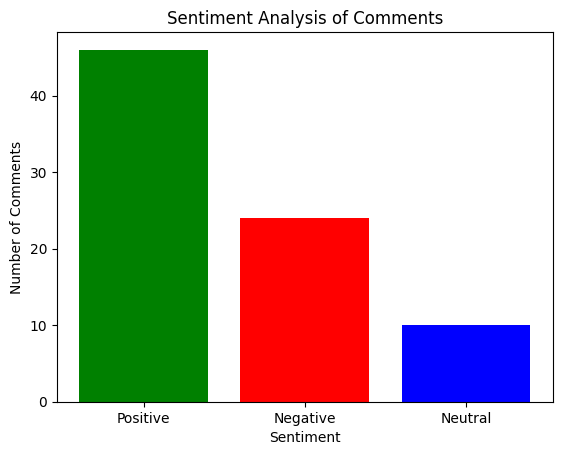

Positive comments: 57.50%
Negative comments: 30.00%
Neutral comments: 12.50%


In [12]:
# Create a bar chart to visualize the sentiment analysis results
labels = ['Positive', 'Negative', 'Neutral']
values = [positive_count, negative_count, neutral_count]
colors = ['g', 'r', 'b']

plt.bar(labels, values, color=colors)
plt.title('Sentiment Analysis of Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

# Calculate the percentage of each sentiment
total_comments = len(sentiments)
positive_percentage = (positive_count / total_comments) * 100
negative_percentage = (negative_count / total_comments) * 100
neutral_percentage = (neutral_count / total_comments) * 100

# Print the percentages
print(f"Positive comments: {positive_percentage:.2f}%")
print(f"Negative comments: {negative_percentage:.2f}%")
print(f"Neutral comments: {neutral_percentage:.2f}%")


In [ ]:
# Define the topic
topic = "Machine Learning"

# Search for videos related to the topic
response = youtube.search().list(
    q=topic,
    type="video",
    part="id,snippet",
    maxResults=10
).execute()

# Extract video IDs and titles
video_ids = []
video_titles = []
for item in response["items"]:
    video_ids.append(item["id"]["videoId"])
    video_titles.append(item["snippet"]["title"])

# Print the video links
for i, video_id in enumerate(video_ids):
    print(f"{i+1}. https://www.youtube.com/watch?v={video_id}")

In [ ]:
# prompt: python code to  collect text data from reddit

import praw

# Create a Reddit instance
reddit = praw.Reddit(
    client_id="YOUR_CLIENT_ID",
    client_secret="YOUR_CLIENT_SECRET",
    user_agent="YOUR_USER_AGENT"
)

# Specify the subreddit and keyword to search for
subreddit_name = "learnpython"
keyword = "help"

# Create a list to store the comments
comments = []

# Iterate through the submissions in the subreddit
for submission in reddit.subreddit(subreddit_name).search(keyword, sort="new", limit=10):

    # Extract the comments from the submission
    submission.comments.extract()

    # Iterate through the comments
    for comment in submission.comments.list():

        # Add the comment text to the list
        comments.append(comment.body)

# Print the collected comments
for comment in comments:
    print(comment)
